# Exercise notes for VII LAPIS - Pulsations Along Stellar Evolution

# Tutorial on the Lightkurve Package
### By Simon J. Murphy

Lightkurve is a friendly package for Kepler and TESS time series analysis in Python.

This tutorial relies heavily on the excellent documentation for the lightkurve package at https://docs.lightkurve.org/index.html

The aim of this tutorial is
    * to showcase the Lightkurve and Eleanor packages; 
    * to get you familiar with the Jupyter Notebook environment; and
    * to give you a complete set of working examples for data retrieval

At the end of the exercise, you will be able to
    * Download and inspect target pixel files
    * Create your own light curve from those pixel files
    * Apply simple processing operations on those lightcurves
    * Download ready-made light curves from MAST
    * Plot a light curve with python
    * Export your light curve to a file
    * Open a light curve file in Period04
    * Calculate Fourier transforms
    * Extract pulsation frequencies

For this exercise you will need to
    * open and edit this Jupiter Notebook
    * (LATER) open Period04

You will be creating your own notes in this notebook, using the framework provided here.

# Let's get started!

In [1]:
from lightkurve import search_targetpixelfile
tpf = search_targetpixelfile('KIC 6922244', quarter=4).download()

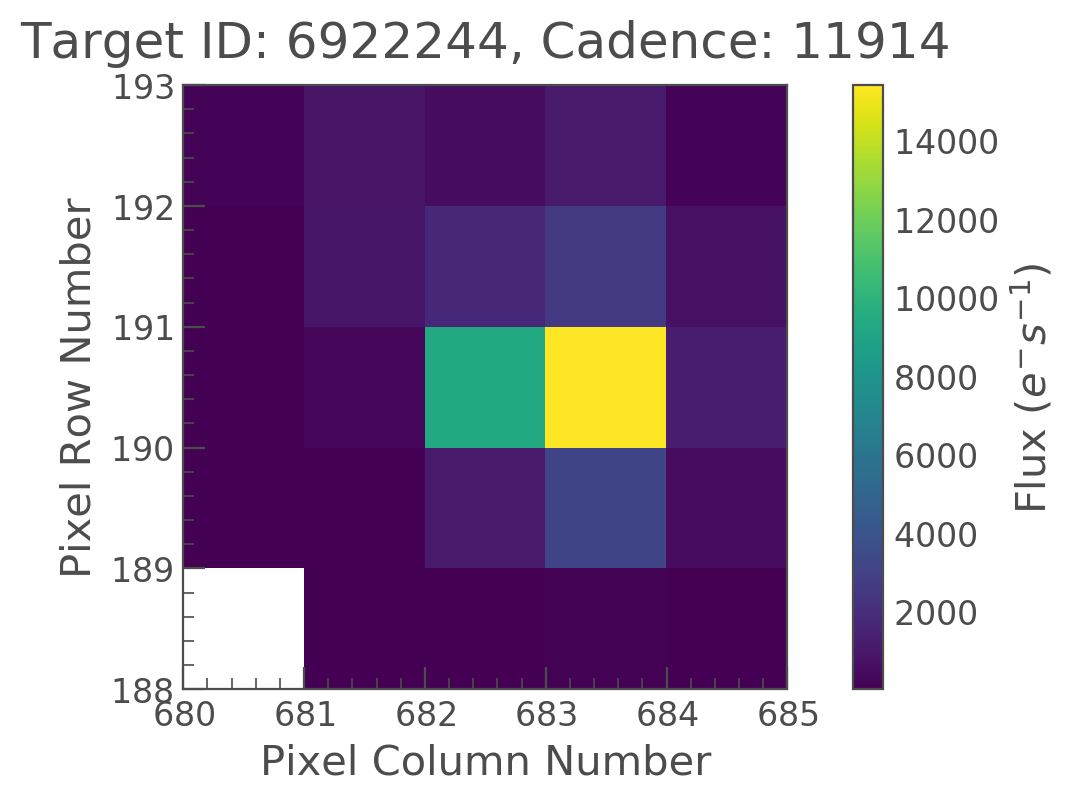

In [2]:
tpf.plot()

This is a postage stamp. tpf is just a variable name that we assigned our targetpixelfile to.

In [3]:
tpf

KeplerTargetPixelFile Object (ID: 6922244)

In [4]:
tpf.mission

'Kepler'

In [5]:
tpf.quarter

4

In [6]:
tpf.ra

281.28812

## TPF functions

There are many functions for a tpf http://docs.lightkurve.org/api/lightkurve.targetpixelfile.KeplerTargetPixelFile.html

In [7]:
kic = "KIC 6922244"

Let's save our KIC number to a variable for later

In [8]:
kic = "KIC 6922244"

## Time and flux

We are usually interested in the time and flux data.

In [9]:
tpf.time

array([352.37632485, 352.39675805, 352.43762445, ..., 442.16263546,
       442.18306983, 442.2035041 ])

In [10]:
tpf.astropy_time

<Time object: scale='tdb' format='jd' value=[2455185.37632485 2455185.39675805 2455185.43762445 ... 2455275.16263546
 2455275.18306983 2455275.2035041 ]>

Our target pixel file has a shape, so the flux has a shape, too.

In [11]:
tpf.flux.shape

(4116, 5, 5)

We can plot any frame of that. Or get the values in any frame.

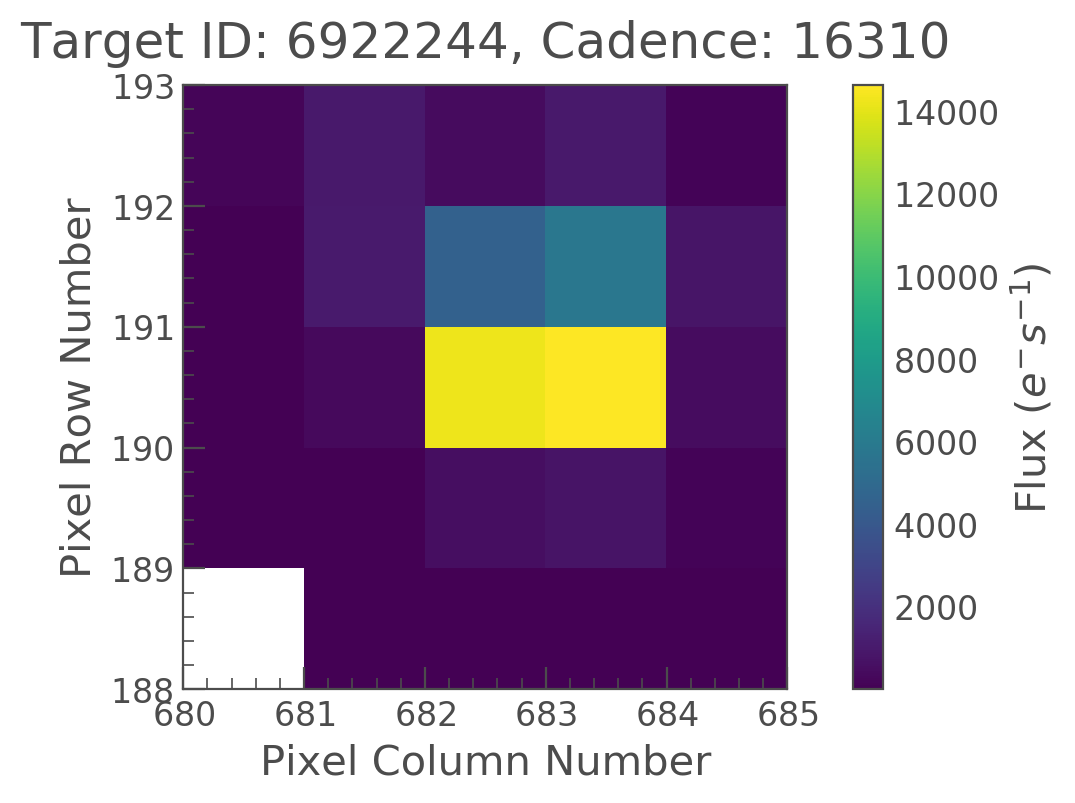

In [12]:
tpf.plot(frame=4115)

There's a default pipeline mask, and we can plot that

In [13]:
tpf.pipeline_mask

array([[False, False, False, False, False],
       [False, False,  True,  True, False],
       [False, False,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False, False,  True, False]])

We can modify that and plot our modified version

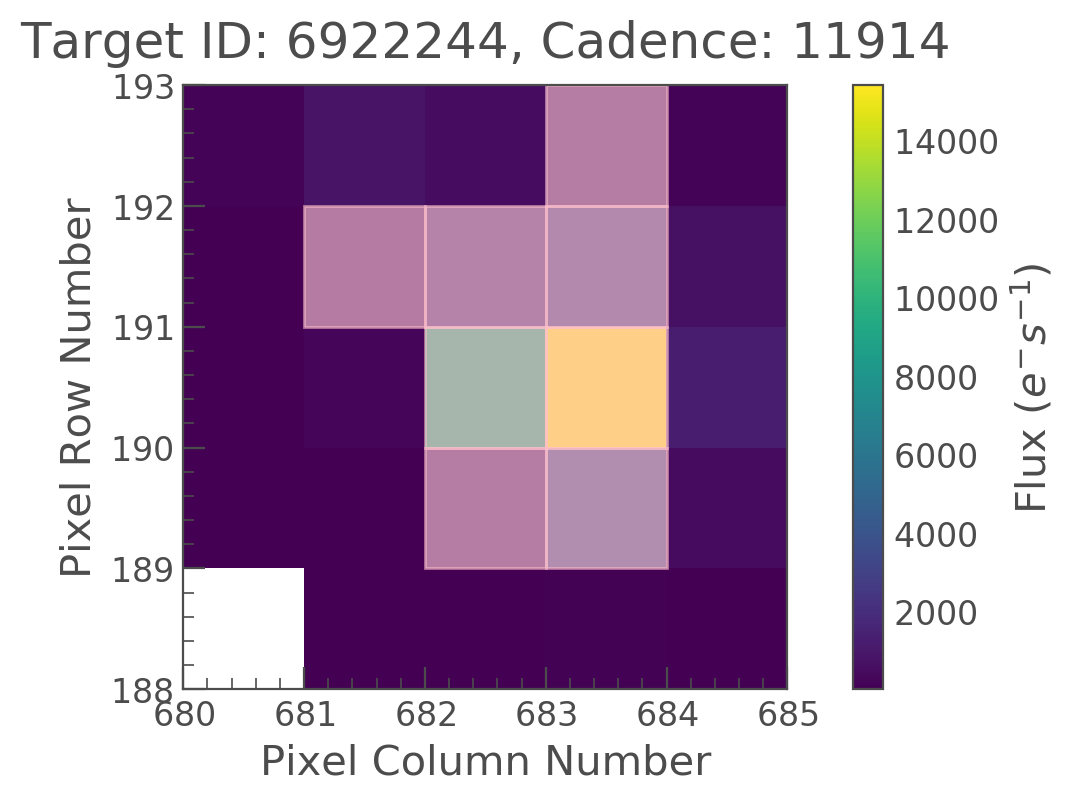

In [14]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

In [15]:
new_mask =  tpf.pipeline_mask
new_mask[2][4] = True
new_mask

array([[False, False, False, False, False],
       [False, False,  True,  True, False],
       [False, False,  True,  True,  True],
       [False,  True,  True,  True, False],
       [False, False, False,  True, False]])

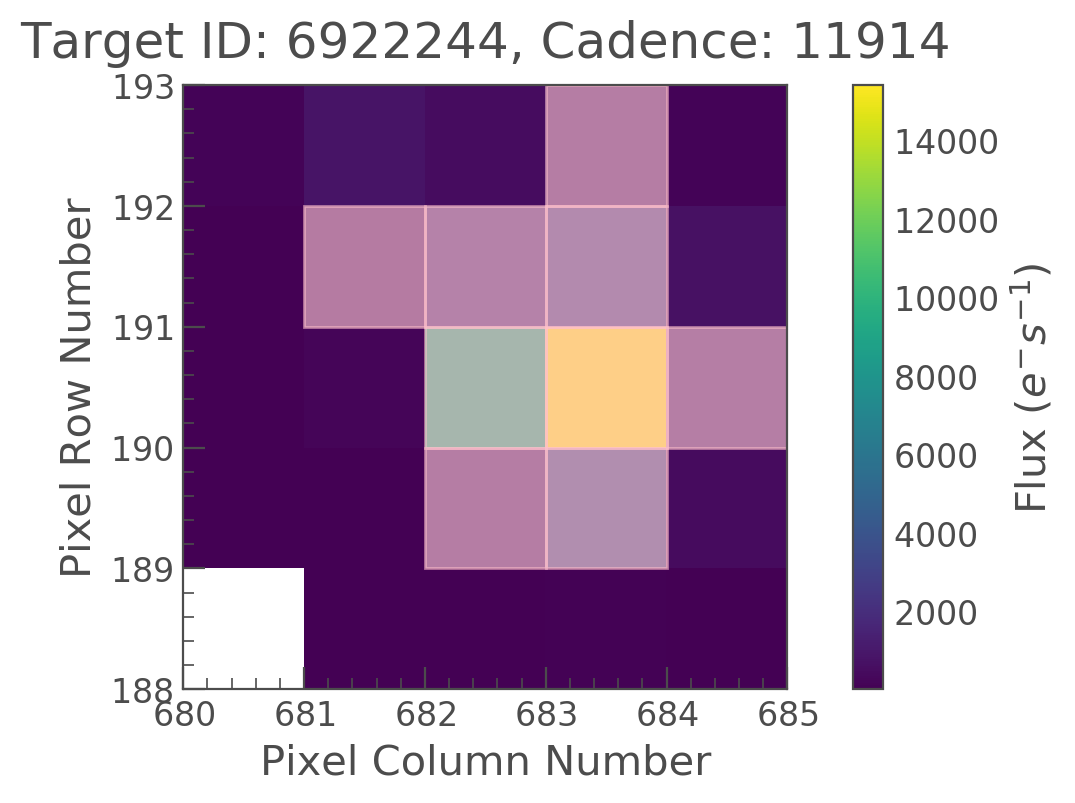

In [16]:
tpf.plot(aperture_mask=new_mask)

# Making a light curve

Let's make our lightcurve from this new version and see what it looks like

In [17]:
lc = tpf.to_lightcurve(aperture_mask=new_mask)

In [18]:
lc

KeplerLightCurve(ID: 6922244)

We can flatten and normalise it

In [19]:
lc.time

array([352.37632485, 352.39675805, 352.43762445, ..., 442.16263546,
       442.18306983, 442.2035041 ])

In [20]:
lc.flux

array([44897.92 , 44906.04 , 44902.89 , ..., 43654.285, 43646.22 ,
       43648.355], dtype=float32)

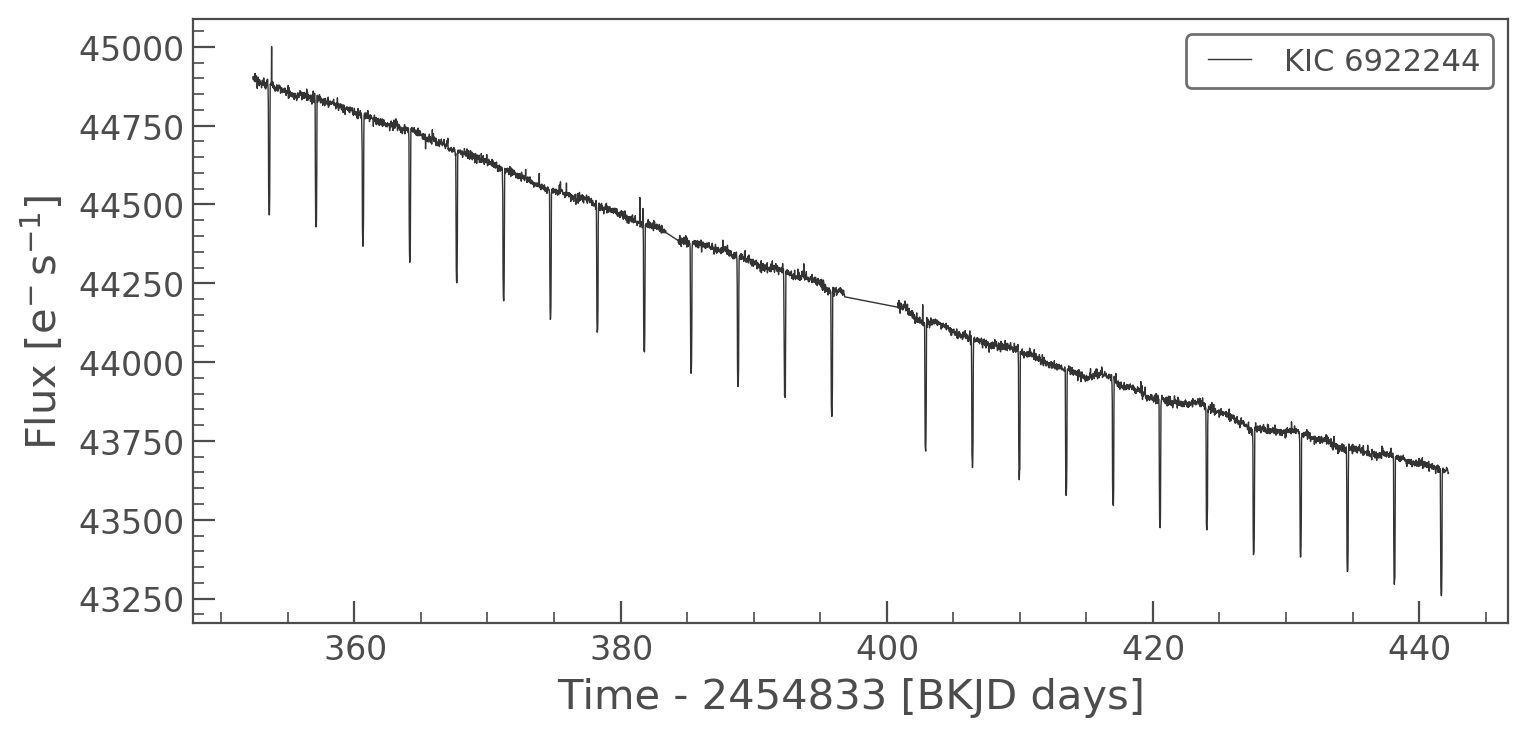

In [21]:
lc.plot()

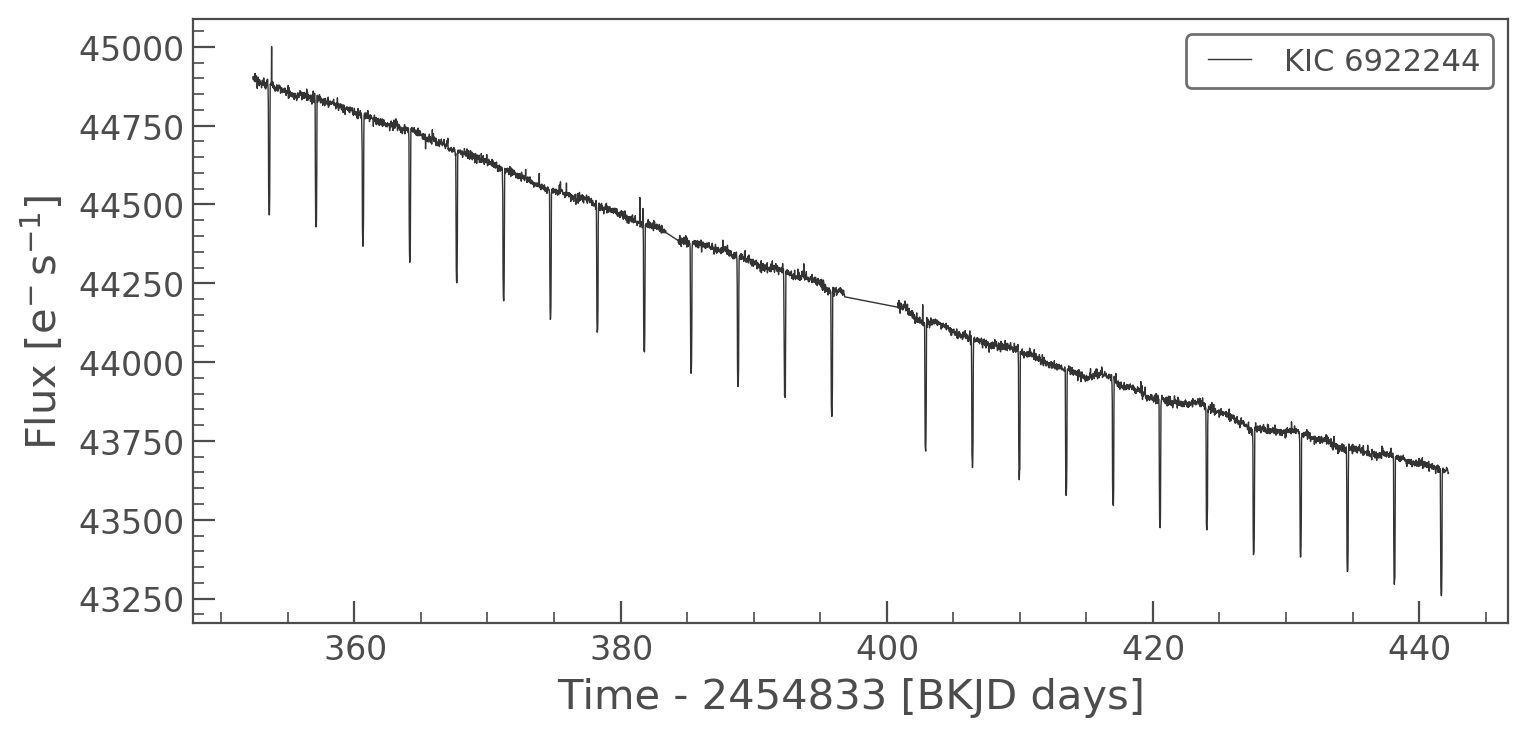

In [22]:
lc.plot()

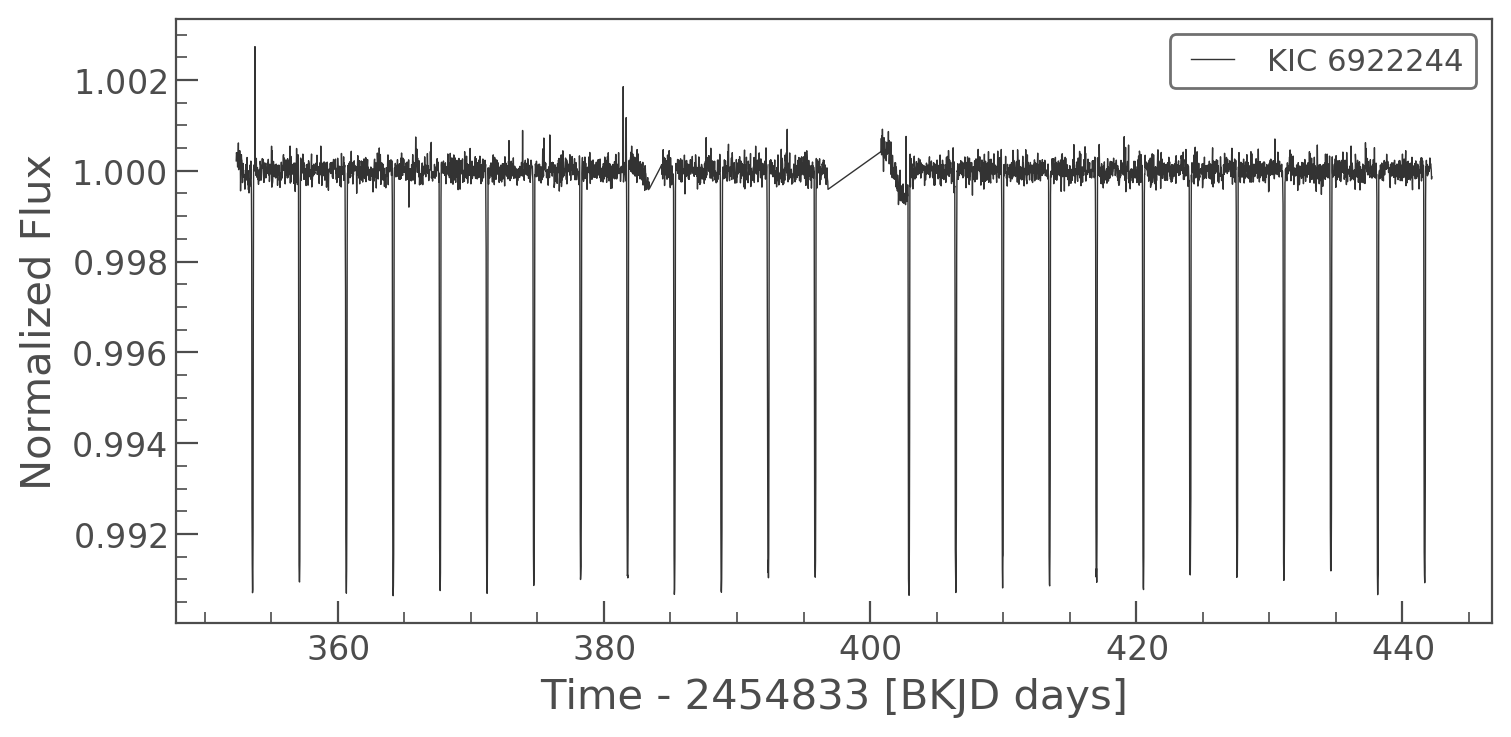

In [23]:
lc.flatten().normalize().plot()

In [24]:
flc = lc.flatten()

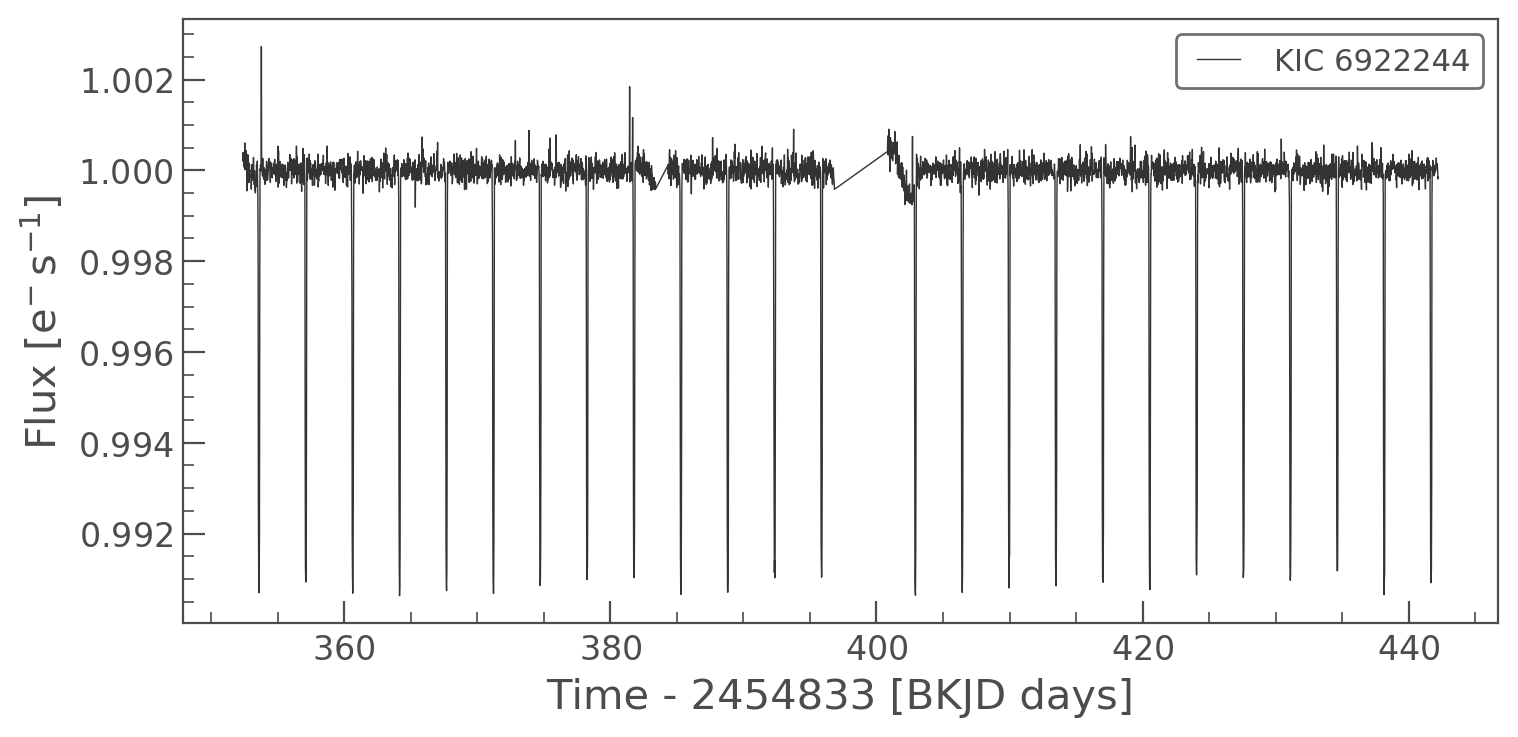

In [25]:
flc.plot()

We can fold and bin and string these commands together

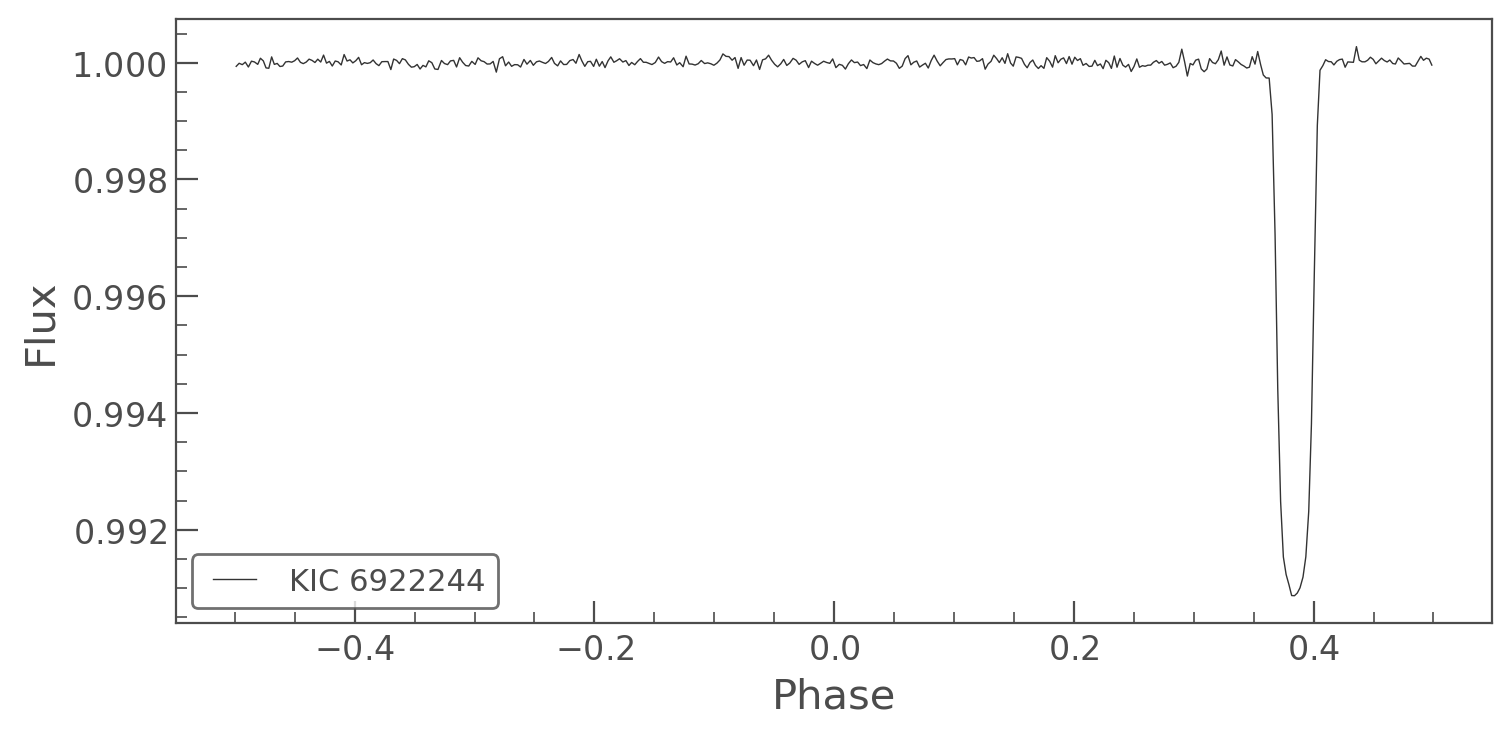

In [26]:
flc.fold(period=3.5225).bin(binsize=10).plot()

# Downloading light curve files

search for and download a lightcurvefile

In [27]:
from lightkurve import search_lightcurvefile
lcf = search_lightcurvefile("kic 6922244", quarter=4).download()

Plot the lightcurve and choose the 'best' flux

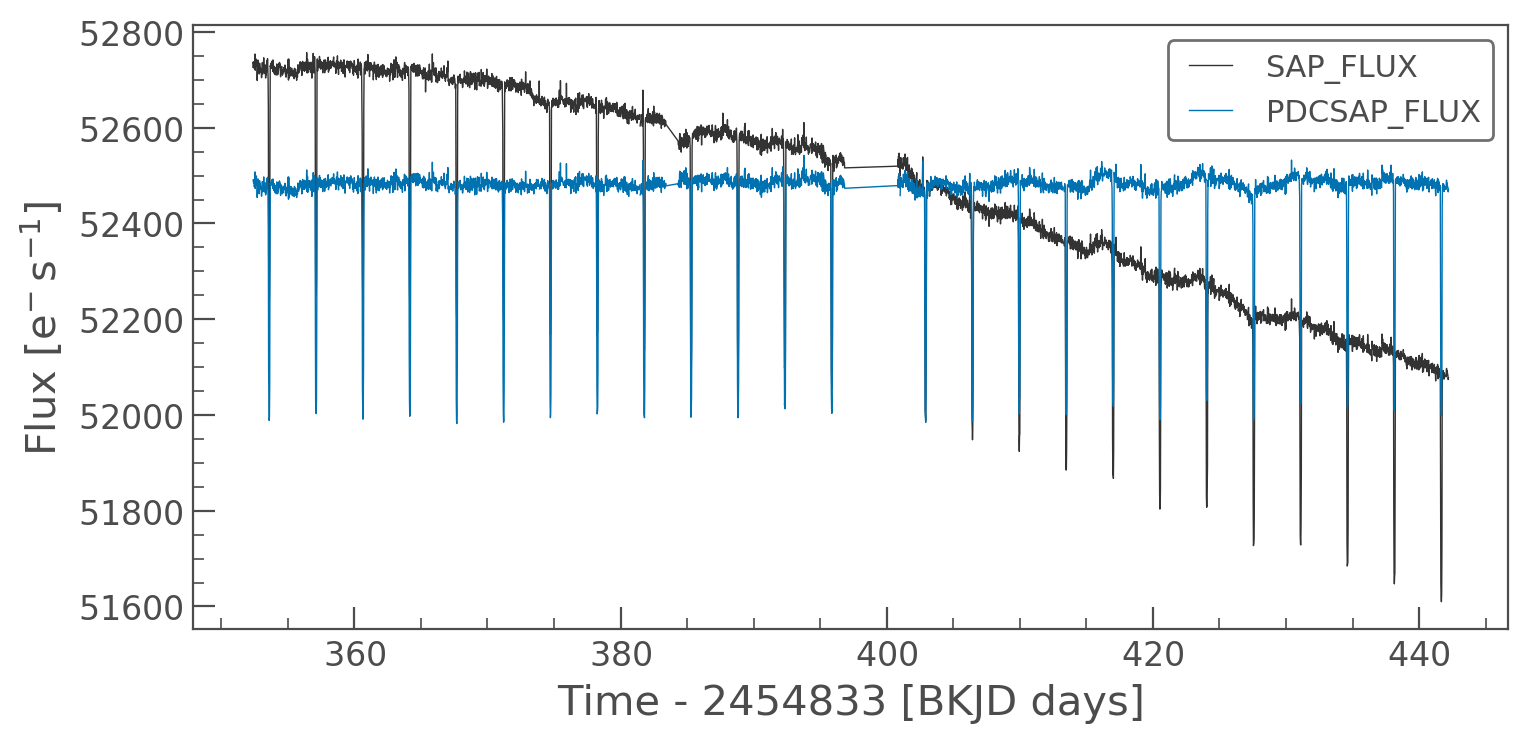

In [28]:
lcf.plot()

In [29]:
pdcsap = lcf.PDCSAP_FLUX

In [30]:
pdcsap

KeplerLightCurve(ID: 6922244)

In [31]:
pdcsap.time

array([352.37632485, 352.39675805, 352.43762445, ..., 442.16263546,
       442.18306983, 442.2035041 ])

In [32]:
pdcsap.dec

42.45108

# Exporting our lightcurve

remove nan values and convert to magnitudes

In [33]:
my_amazing_lc = pdcsap.remove_nans()

In [34]:
import numpy as np

# convert to mag
magnitude = -2.5 * np.log10(my_amazing_lc.flux)
magnitude = magnitude - np.average(magnitude)

save as a csv using np.savetxt

In [35]:
# save
np.savetxt("tmp.csv",np.array([my_amazing_lc.time,magnitude]).T, delimiter=",")

In [36]:
[my_amazing_lc.time,magnitude]

[array([352.39675805, 352.43762445, 352.45805764, ..., 442.16263546,
        442.18306983, 442.2035041 ]),
 array([-4.5871735e-04, -3.2043457e-04, -4.7969818e-04, ...,
        -1.3923645e-04,  5.4359436e-05, -5.0544739e-05], dtype=float32)]

### Note about importing to Period04

Period04 prefers .txt not .csv, and it cares about the delimiter used

In [37]:
np.savetxt("tmp.txt",np.array([my_amazing_lc.time,magnitude]).T, delimiter=" ")

# TESS data - lightcurvefiles

download and export SX Phe with TESS

In [38]:
sx = search_lightcurvefile("SX Phe").download() # you can use double quotes or single

In [39]:
sx

TessLightCurveFile(TICID: 224285325)

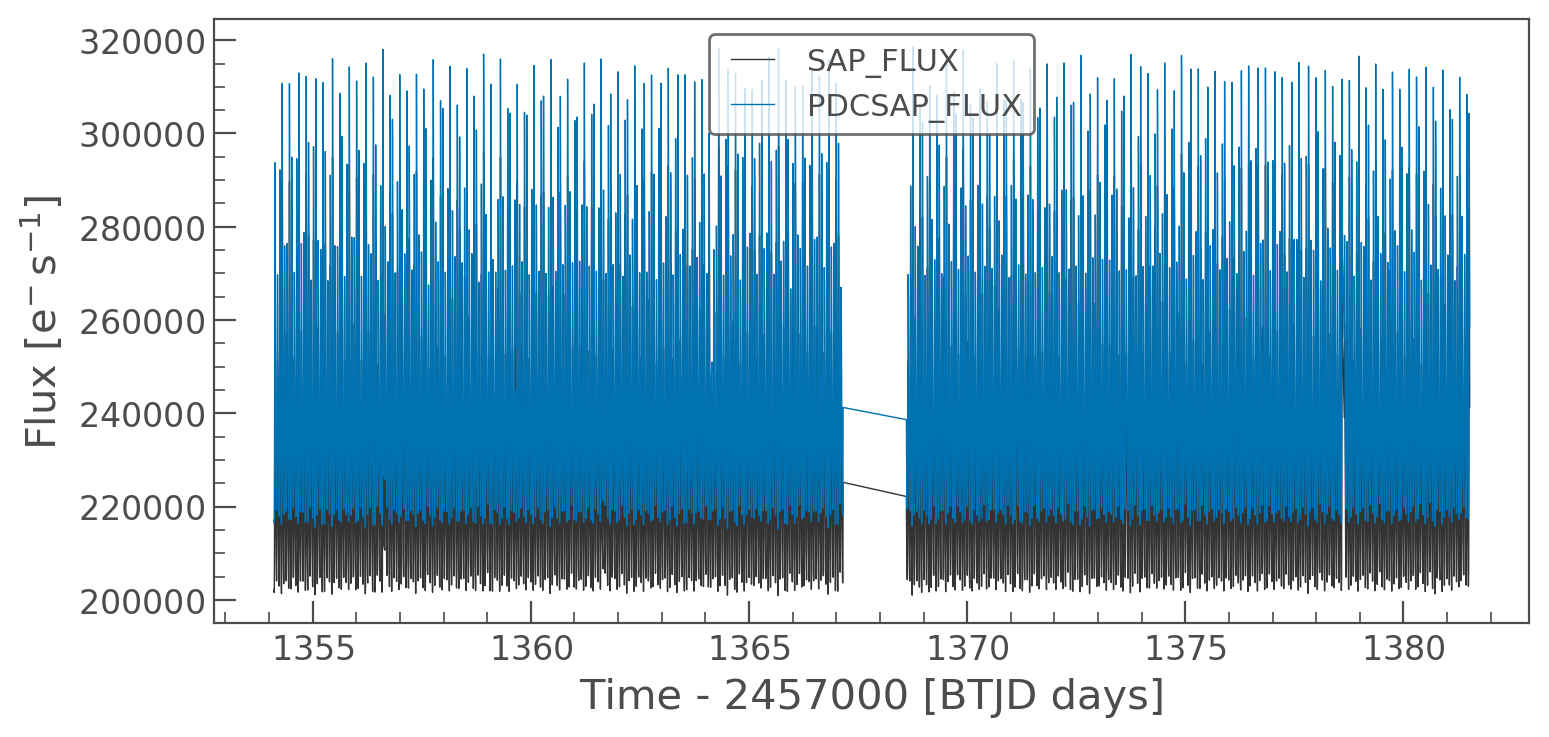

In [40]:
sx.plot()

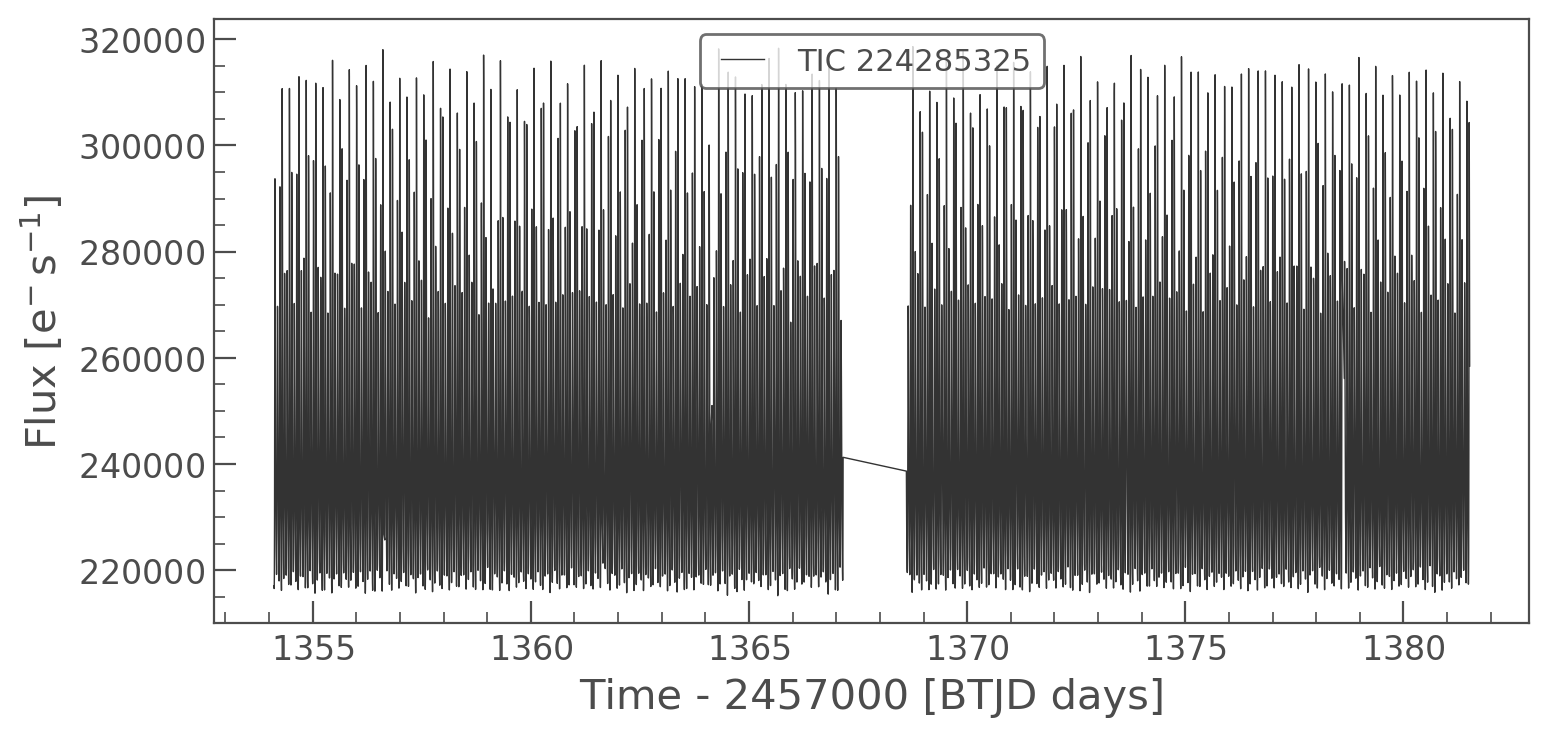

In [41]:
pdc_sx = sx.PDCSAP_FLUX.remove_nans()
pdc_sx.plot()

In [42]:
# convert to mag
mag = -2.5*np.log10(pdc_sx.flux)
mag -= np.average(mag)

# save
np.savetxt("sxphe.txt",np.array([pdc_sx.time,mag]).T, delimiter=" ")

Import to Period04. Look at the combination frequencies.

Exercise: Investigate KIC9700322. SC data from Q5 only.
    * Check the aperture. Do you want to modify it?
    * Download and import to Period04.
    * Investigate! Which are the independent frequencies?

# Eleanor for TESS FFIs

This will be the activity for the last 10 minutes of the class

(Sorry we didn't get around to this)

import packages

In [43]:
# eleanor must be pip installed!
# and tensorflow
import eleanor
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

check eleanor version

In [44]:
print(eleanor.__version__)

0.2.10


cut out a postage stamp

In [45]:
star = eleanor.Source(tic=38846515, sector=1, tc=True)

extract the photometry

In [46]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True)

/Users/sjm/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sjm/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sjm/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sjm/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

Don't worry about all the warnings above. It's because Eleanor uses an older version of the Tensorflow package.

This will be upgraded in the future, but not yet...

In [47]:
# we can inspect our datafile and see that it is an eleanor target data object
data

Do a quality cut and plot the three lightcurves

In [48]:
# Keep only the data with a quality flag of zero (i.e. no issues)
q = data.quality == 0

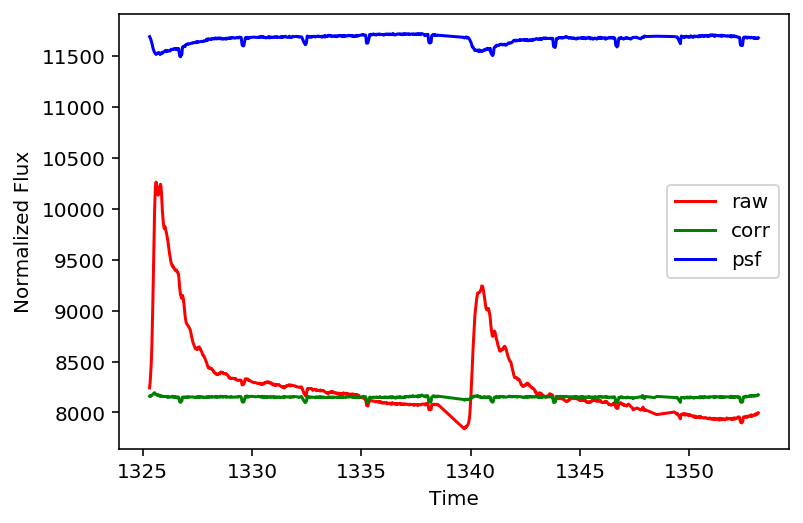

In [49]:
plt.plot(data.time[q],data.raw_flux[q],c='r',label='raw')
plt.plot(data.time[q],data.corr_flux[q],c='g', label='corr')
plt.plot(data.time[q],data.psf_flux[q],c='b', label='psf')

plt.ylabel('Normalized Flux')
plt.xlabel('Time')

plt.legend()

Choose the best one... export the corr_flux, since it is the best

NOTE: We don't yet have a LightCurve object from the lightkurve package.

In [50]:
from lightkurve.lightcurve import LightCurve as LC

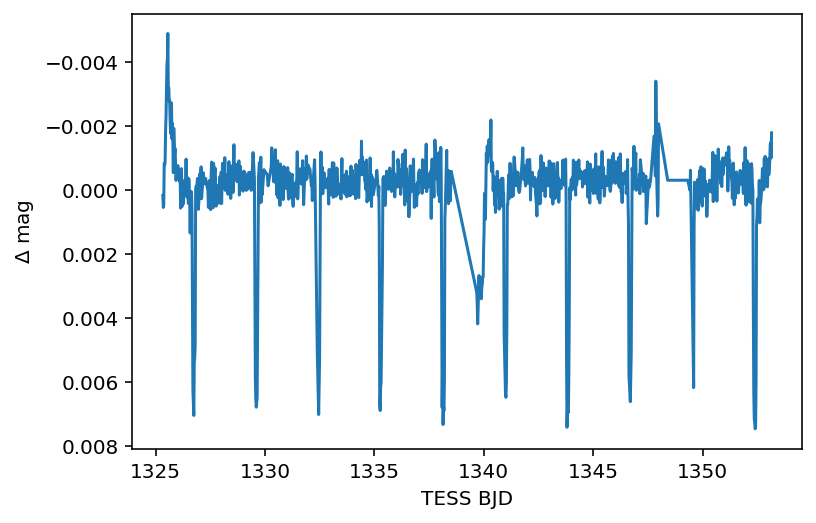

In [51]:
# create a lightcurve object
lk = LC(data.time[q], data.corr_flux[q])
lk = lk.remove_nans().flatten()

# convert to mag
magnitude = -2.5 * np.log10(lk.flux)
magnitude = magnitude - np.average(magnitude)

# plot
plt.plot(lk.time, magnitude)
plt.gca().invert_yaxis()
plt.ylabel(r"$\Delta$ mag")
plt.xlabel("TESS BJD")

# save
np.savetxt("eleanor_lightcurve.txt",np.array([lk.time,magnitude]).T, delimiter=" ")

## A reminder of the goals for this class

Now that we are at the end of the exercise, you should be able to
    * Download and inspect target pixel files
    * Create your own light curve from those pixel files
    * Apply simple processing operations on those lightcurves
    * Download ready-made light curves from MAST
    * Plot a light curve with python
    * Export your light curve to a file
    * Open a light curve file in Period04
    * Calculate Fourier transforms
    * Extract pulsation frequencies

## Useful resources

https://adina.feinste.in/eleanor/getting_started/tutorial.html

https://docs.lightkurve.org/tutorials/index.html